In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
datas = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])

In [3]:
datas.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


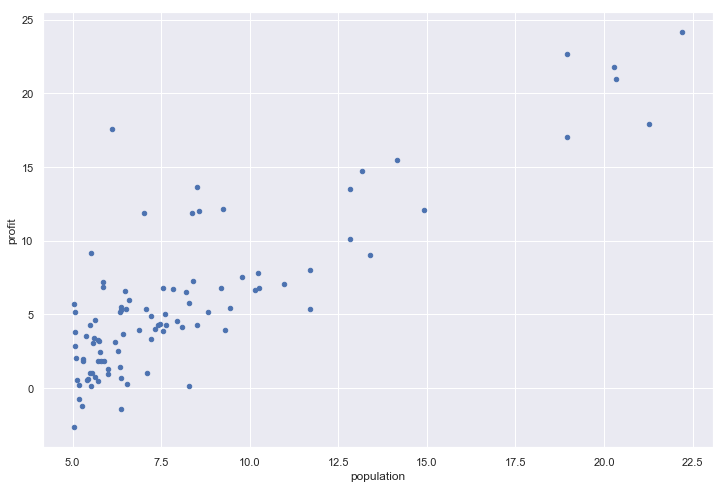

In [4]:
datas.plot(kind='scatter', x='population', y='profit', figsize=(12,8))

In [5]:
datas.insert(0, 'ones', 1)
datas.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
X = datas.iloc[:, :-1]
y = datas.iloc[:, -1]

In [7]:
theta = np.zeros(X.shape[1])

In [8]:
theta

array([0., 0.])

In [9]:
X = X.values
y = y.values

In [10]:
def hypothesis(X, theta):
    return  X @ theta

In [11]:
def cost(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta) - y
    return h.T @ h/(2 * m)

In [12]:
cost(X, y, theta)

32.072733877455676

In [13]:
def gradient(X, y, theta, alpha):
     m = X.shape[0]
     h = hypothesis(X, theta) - y
     inner = X.T @  h
     theta -= alpha/m * inner
     return theta

In [14]:
def batchgradient(iterations, theta):
    cost_list = []
    for i in range(iterations):
        theta = gradient(X, y, theta, alpha)
        cost_list.append(cost(X, y, theta))
    return cost_list, theta

In [15]:
alpha = 0.01
cost_list, theta = batchgradient(1500, theta)

In [16]:
theta

array([-3.63029144,  1.16636235])

Text(0.5,1,'Error vs. Training Epoch')

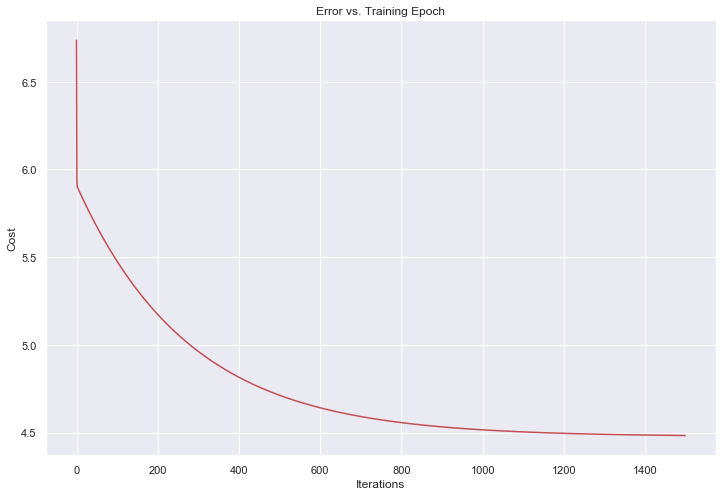

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1500), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Text(0.5,1,'Linear regression with one variable')

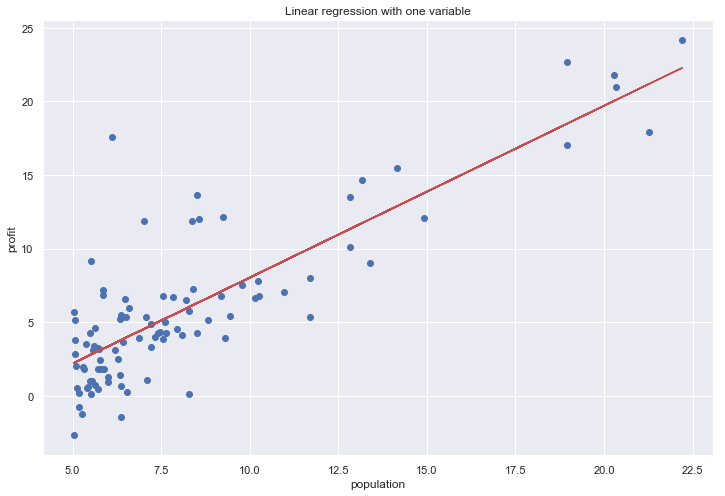

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:,-1], y)
ax.plot(X[:,-1], X[:,-1] * theta[1] + theta[0], c = 'r')
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Linear regression with one variable')